# EDA - US Accidents 2020

### Reading in the data

In [2]:
import pandas as pd
import pyspark
from   io           import StringIO
import os
import sys
import warnings

import matplotlib.pyplot as plt

import requests
import seaborn as sns

warnings.filterwarnings('ignore')

%pylab inline
%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


In [3]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

21/12/12 22:04:42 WARN Utils: Your hostname, Amirs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.0.63 instead (on interface en0)
21/12/12 22:04:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/12/12 22:04:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
fullpath = 'usa_accidents_2020.csv'
    
# first line of file
! head -n 1 {fullpath}

ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [5]:
columns = ['ID','Severity','Start_Time','End_Time','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)',
               'Description','Number','Street','Side','City','County','State','Zipcode','Country','Timezone','Airport_Code',
               'Weather_Timestamp','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
               'Wind_Direction','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Amenity','Bump','Crossing',
               'Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal',
               'Turning_Loop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [6]:
# read.csv is very similar to the Pandas version
data = spark.read.csv(fullpath,
                     sep=',',
                     inferSchema=True,
                     header=True)

### Converting to pandas

In [7]:
data_pd_df = data.select('*').toPandas()

21/12/12 22:06:12 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [68]:
data_pd_df.shape

(787932, 47)

# Total Accidents Recorded in 2020 = 787932

In [9]:
data_pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787932 entries, 0 to 787931
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     787932 non-null  object 
 1   Severity               787932 non-null  int32  
 2   Start_Time             787932 non-null  object 
 3   End_Time               787932 non-null  object 
 4   Start_Lat              787932 non-null  float64
 5   Start_Lng              787932 non-null  float64
 6   End_Lat                787932 non-null  float64
 7   End_Lng                787932 non-null  float64
 8   Distance(mi)           787932 non-null  float64
 9   Description            787932 non-null  object 
 10  Number                 302276 non-null  float64
 11  Street                 787932 non-null  object 
 12  Side                   787932 non-null  object 
 13  City                   787887 non-null  object 
 14  County                 787932 non-nu

In [10]:
data_pd_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2953938,2,2020-11-01 22:33:04,2020-11-02 00:11:16,39.594265,-76.671599,39.588595,-76.675189,0.436,Incident on I-83 SB near EXIT 27 Road closed. ...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2953939,2,2020-12-14 14:19:00,2020-12-14 17:06:29,37.701913,-121.910487,37.701983,-121.917087,0.361,WB 580 JEO 680. SV BIG RIG FB TRLR,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-2953940,2,2020-12-31 19:20:00,2020-12-31 20:58:08,37.006813,-121.558409,37.002583,-121.556529,0.310,Incident on US-101 SB near CA-152 Right should...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-2953941,2,2020-10-15 23:03:55,2020-10-16 00:20:53,39.446521,-76.330792,39.455652,-76.312348,1.169,Incident on I-95 NB near EXIT 74 Drive with ca...,...,False,False,False,False,False,False,Night,Night,Night,Night
4,A-2953942,2,2020-12-01 14:15:55,2020-12-01 16:15:42,39.221910,-76.801697,39.228970,-76.811217,0.705,Incident on MD-100 WB near EXIT 2 Drive with c...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [11]:
data_pd_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
data_pd_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,787932.000000,787932.000000,787932.000000,787932.000000,787932.000000,787932.000000,302276.000000,762899.000000,756501.000000,761213.000000,766935.000000,763387.000000,759926.000000,739595.000000
mean,2.090783,36.271616,-97.325291,36.271752,-97.325051,0.564374,7881.598397,58.042531,56.812722,65.832333,29.381611,9.064396,7.040047,0.004901
std,0.471606,5.231812,18.477747,5.231877,18.477457,1.574072,15766.724532,17.385680,19.308555,23.211188,1.066930,2.587626,5.804359,0.059473
min,1.000000,24.570584,-124.497470,24.574326,-124.497470,0.000000,1.000000,-89.000000,-89.000000,2.000000,19.370000,0.000000,0.000000,0.000000
25%,2.000000,33.602200,-118.096665,33.603250,-118.096530,0.000000,1189.000000,46.000000,44.000000,50.000000,29.170000,10.000000,3.000000,0.000000
50%,2.000000,36.089780,-92.984773,36.089422,-92.984775,0.089000,3751.000000,58.000000,58.000000,70.000000,29.730000,10.000000,6.000000,0.000000
75%,2.000000,40.034240,-80.322028,40.032639,-80.322119,0.553000,9198.000000,71.000000,71.000000,86.000000,29.980000,10.000000,10.000000,0.000000
max,4.000000,48.993864,-67.484130,48.998901,-67.484130,155.186000,961005.000000,113.000000,113.000000,100.000000,58.040000,120.000000,984.000000,24.000000


## Looking at the data

In [13]:
df_cp = data_pd_df.copy()

In [14]:
df_cp.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   485656
Street                        0
Side                          0
City                         45
County                        0
State                         0
Zipcode                     324
Country                       0
Timezone                    946
Airport_Code               2252
Weather_Timestamp         19345
Temperature(F)            25033
Wind_Chill(F)             31431
Humidity(%)               26719
Pressure(in)              20997
Visibility(mi)            24545
Wind_Direction            28026
Wind_Speed(mph)           28006
Precipitation(in)         48337
Weather_Condition         24081
Amenity                       0
Bump    

In [15]:
missing_data = df_cp.isna().sum(axis=0).sort_values(ascending=False)
missing_data = missing_data.to_frame()
missing_data.columns = ['missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]

missing_data

,missing_count
Number,485656
Precipitation(in),48337
Wind_Chill(F),31431
Wind_Direction,28026
Wind_Speed(mph),28006
Humidity(%),26719
Temperature(F),25033
Visibility(mi),24545
Weather_Condition,24081
Pressure(in),20997


## Graphs and Visualizations

### Aciidents & Cities

In [29]:
cities = df_cp['City'].unique()
len(cities)

8138

In [30]:
# All cities by number of accidents

accidents_by_cities = df_cp['City'].value_counts()
accidents_by_cities

Miami          27062
Los Angeles    19930
Orlando        10168
Sacramento      9972
Charlotte       9844
               ...  
Lytton             1
Brazoria           1
Baileyton          1
Tewksbury          1
Hometown           1
Name: City, Length: 8137, dtype: int64

In [31]:
#Top 10 cities by number of accidents

accidents_by_cities[:10]

Miami          27062
Los Angeles    19930
Orlando        10168
Sacramento      9972
Charlotte       9844
Dallas          9305
Houston         8521
Raleigh         7046
Minneapolis     6815
San Diego       6530
Name: City, dtype: int64

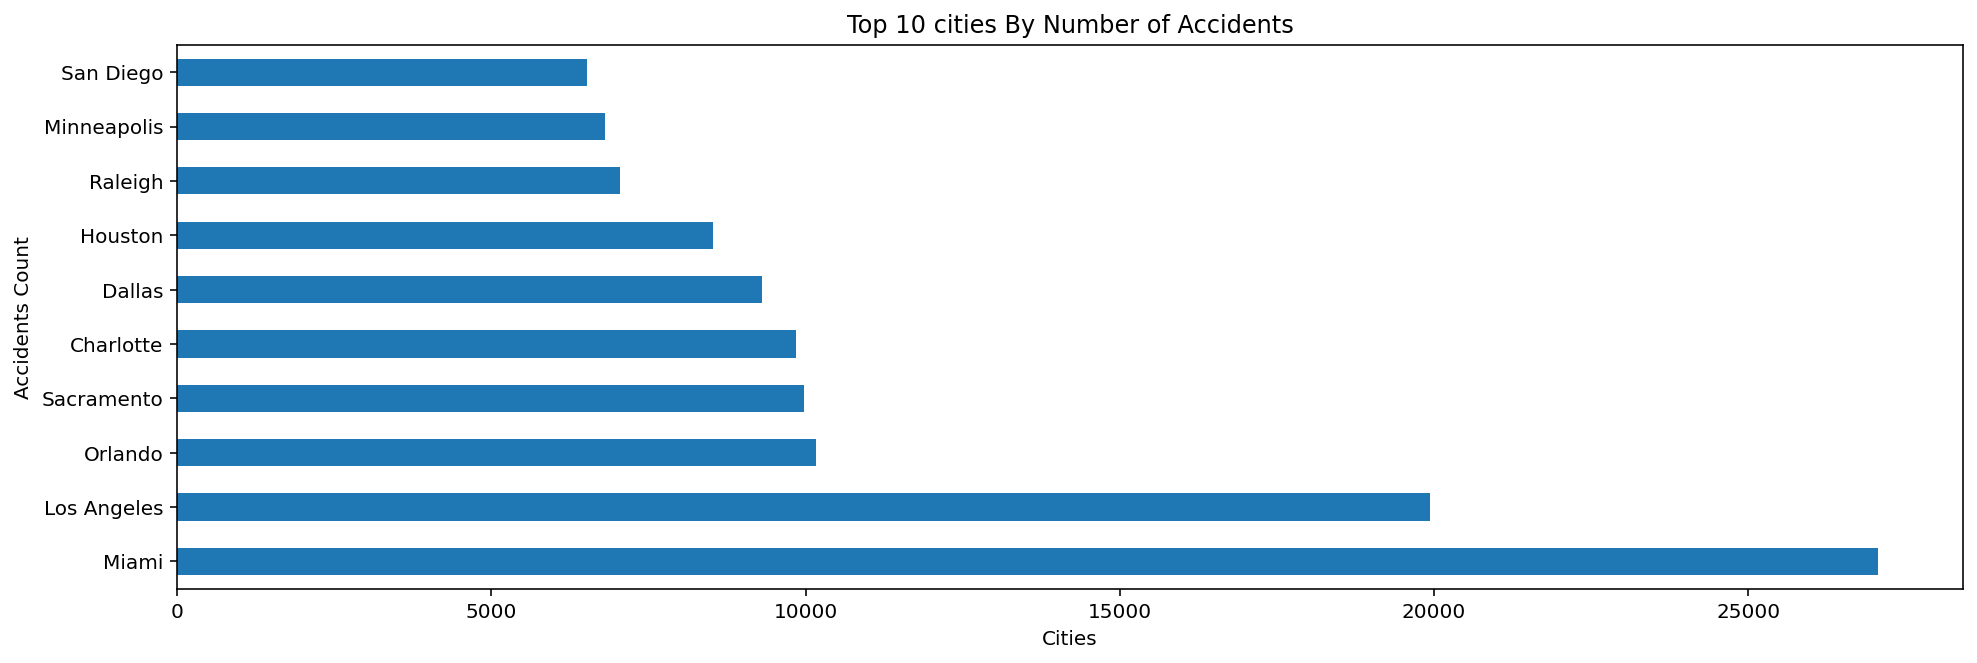

In [32]:
#Bar Chart to Visualize Top 10 cities by number of accidents

fig, ax = plt.subplots(figsize=(16,5))
accidents_by_cities[:10].plot(kind='barh')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

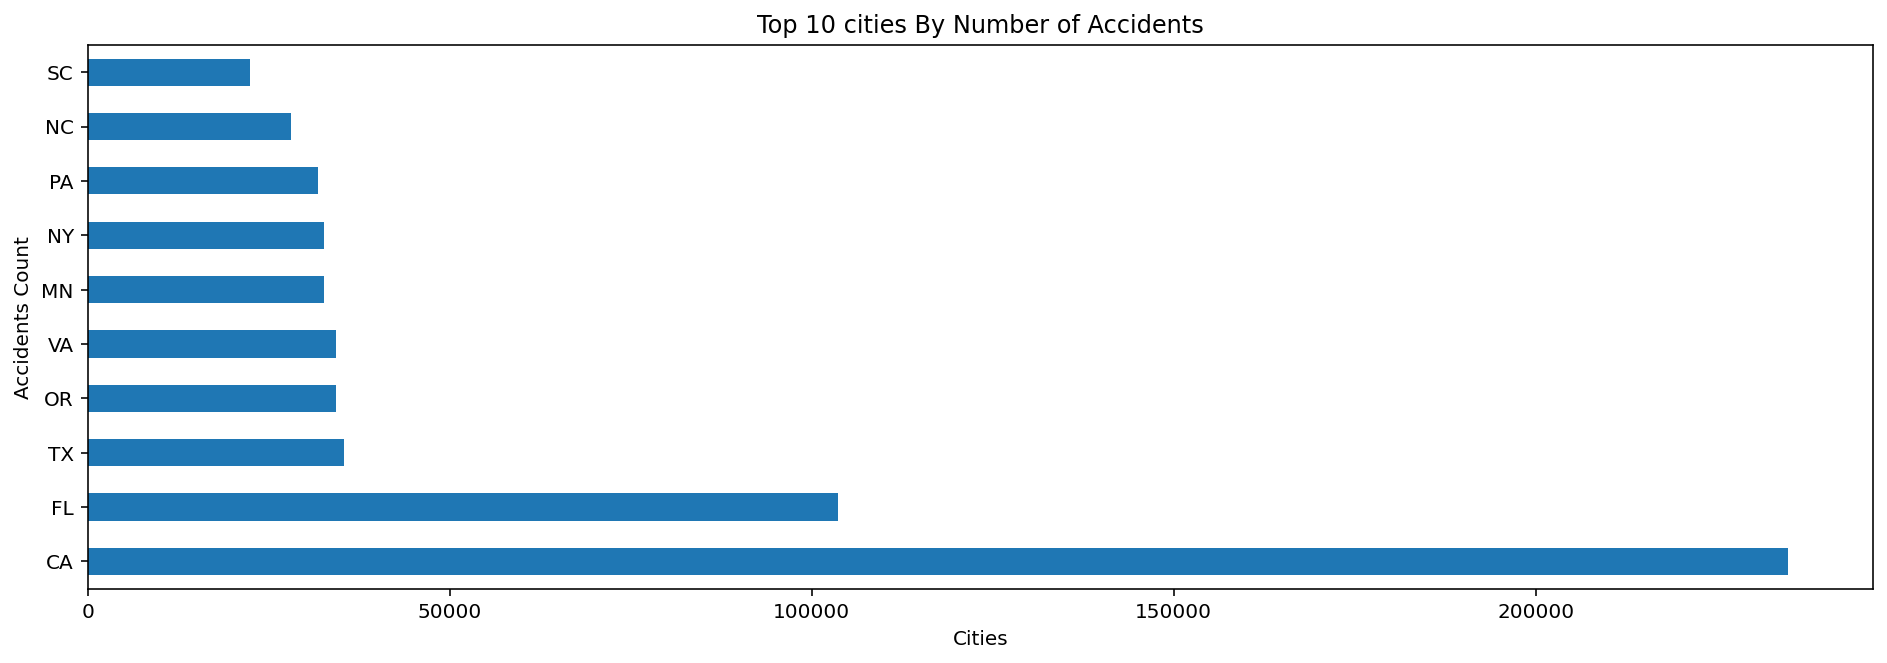

In [33]:
#Bar Chart to Visualize Top 10 cities by number of accidents
accidents_by_states = df_cp['State'].value_counts()

fig, ax = plt.subplots(figsize=(16,5))
accidents_by_states[:10].plot(kind='barh')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

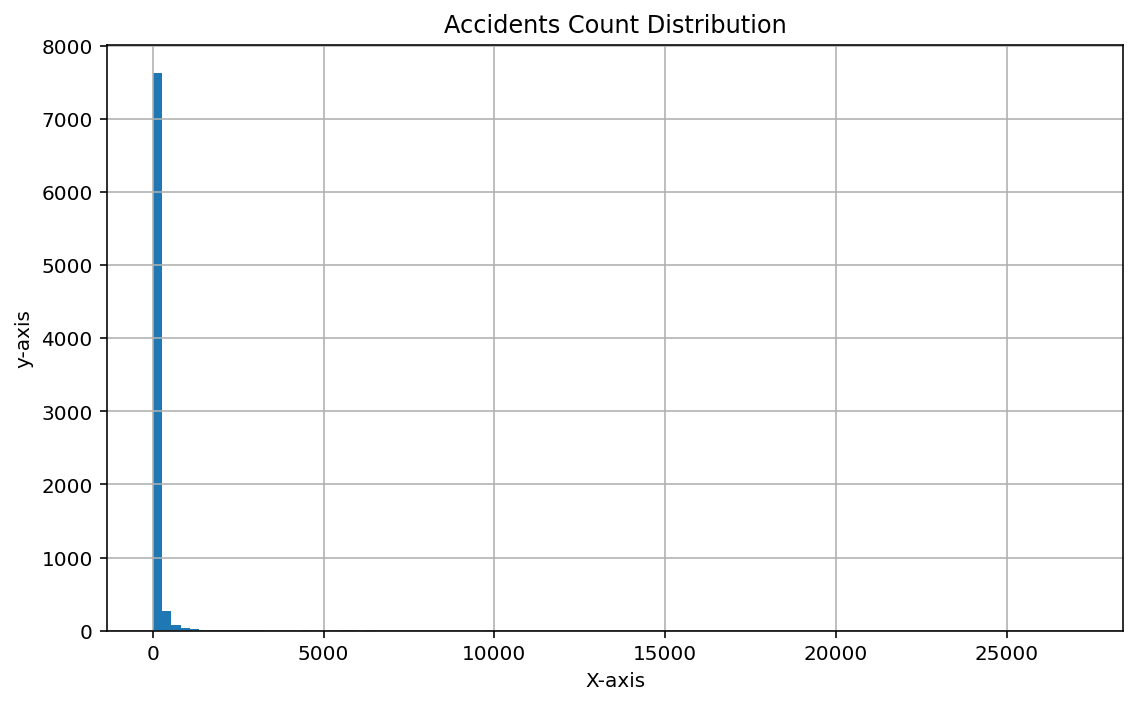

In [34]:
# Let's see how the accidents by cities is distributed

fig, axs = plt.subplots(1, 1,
                        figsize =(8, 5),
                        tight_layout = True)
accidents_by_cities.hist(bins=100)

plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Accidents Count Distribution')

plt.show()

In [35]:
# Let's group the data by high and low

high_accident_cities = accidents_by_cities = accidents_by_cities[accidents_by_cities>=1000]
low_accident_cities = accidents_by_cities = accidents_by_cities[accidents_by_cities<1000]

In [36]:
# Let's find percentages

len(high_accident_cities)/len(cities)

0.014499877119685426

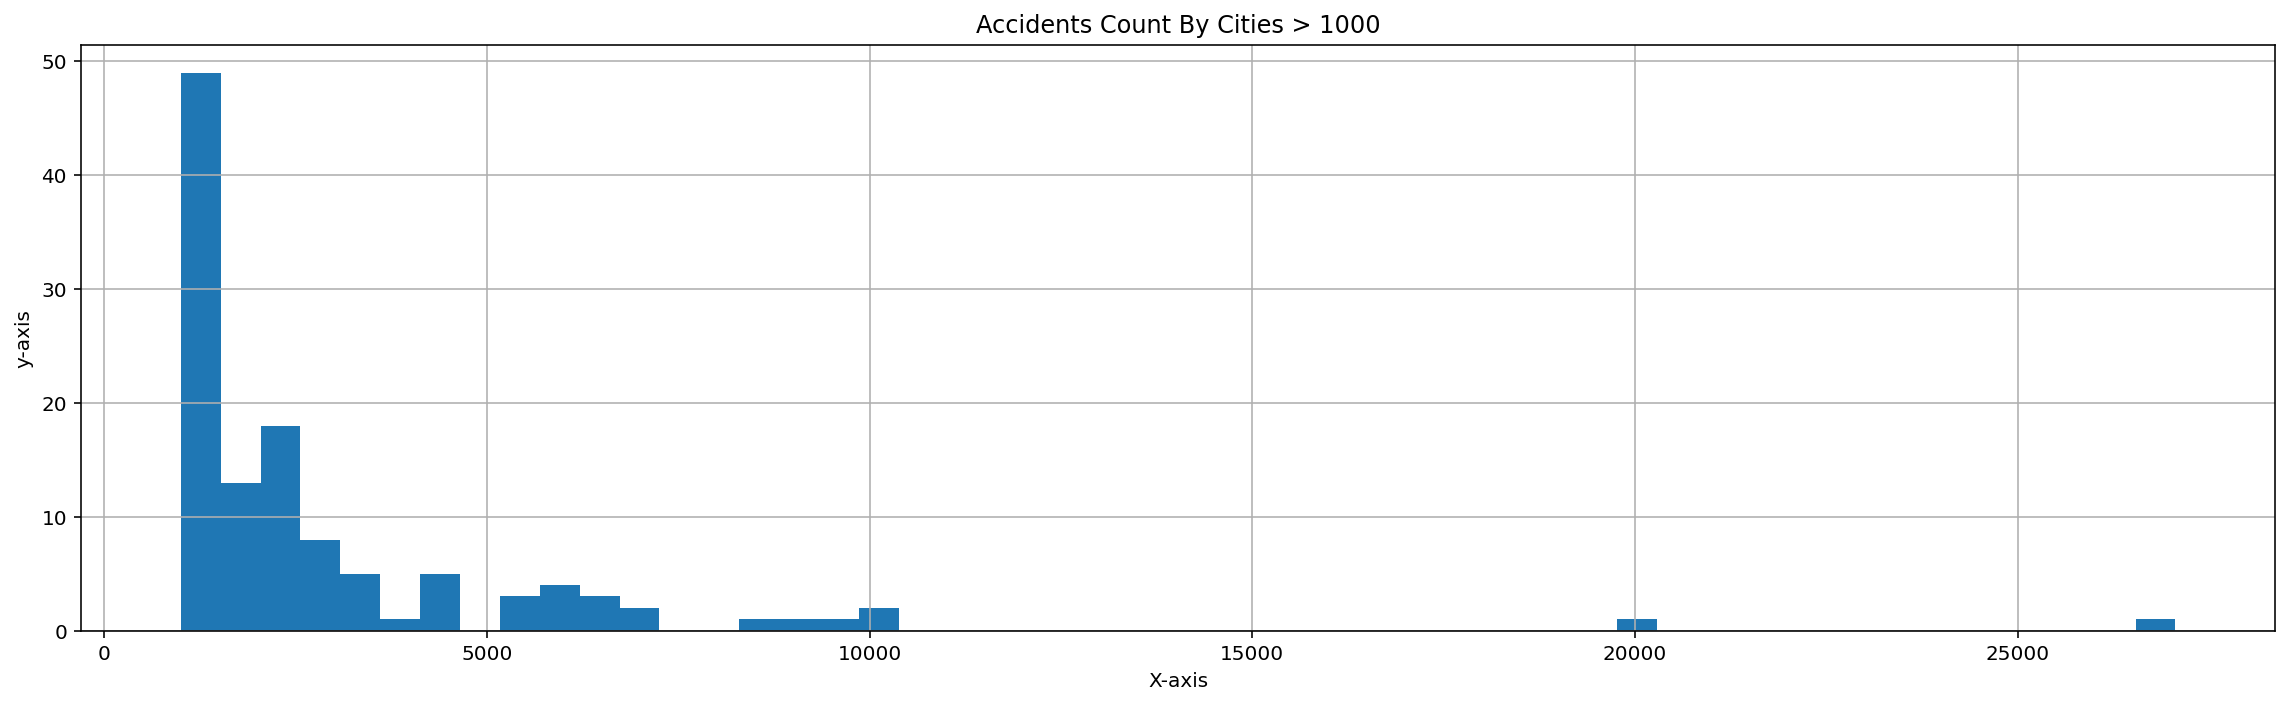

In [37]:
# Zoom in on the data distribution for cities with high accidents

fig, axs = plt.subplots(1, 1,figsize =(16, 5), tight_layout = True)

high_accident_cities.hist(bins = 50)

plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Accidents Count By Cities > 1000')

plt.show()

## Accidents & Severity

In [38]:
# Accidents severity

accidents_severity = df_cp.groupby('Severity').count()['ID']
accidents_severity

Severity
1     28178
2    686971
3     45857
4     26926
Name: ID, dtype: int64

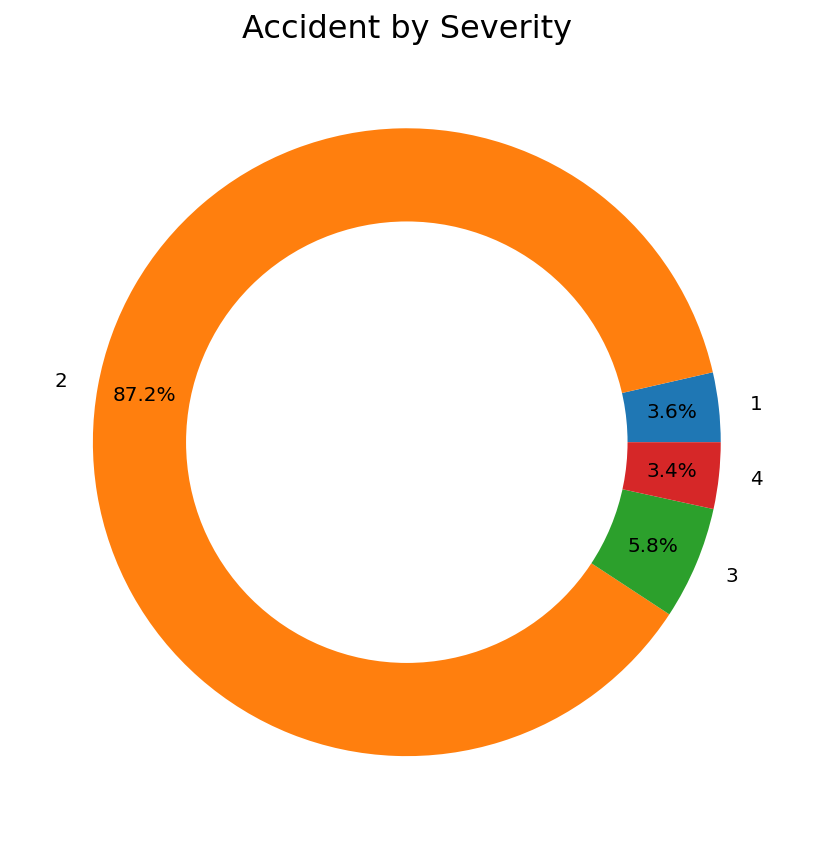

In [40]:
# Let's visualize that

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

## Accidents & dates

In [41]:
# Let's work with the dates 
# (we find it's in wrong format, let's change that)

df_cp['Start_Time'].dtypes

dtype('O')

In [42]:
df_cp['End_Time'].dtypes

dtype('O')

In [43]:
df_cp = df_cp.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
df_cp['Start_Time'].dtypes

dtype('<M8[ns]')

In [44]:
df_cp['Start_Time'][0]

Timestamp('2020-11-01 22:33:04')

In [45]:
df_cp['End_Time'][0]

Timestamp('2020-11-02 00:11:16')

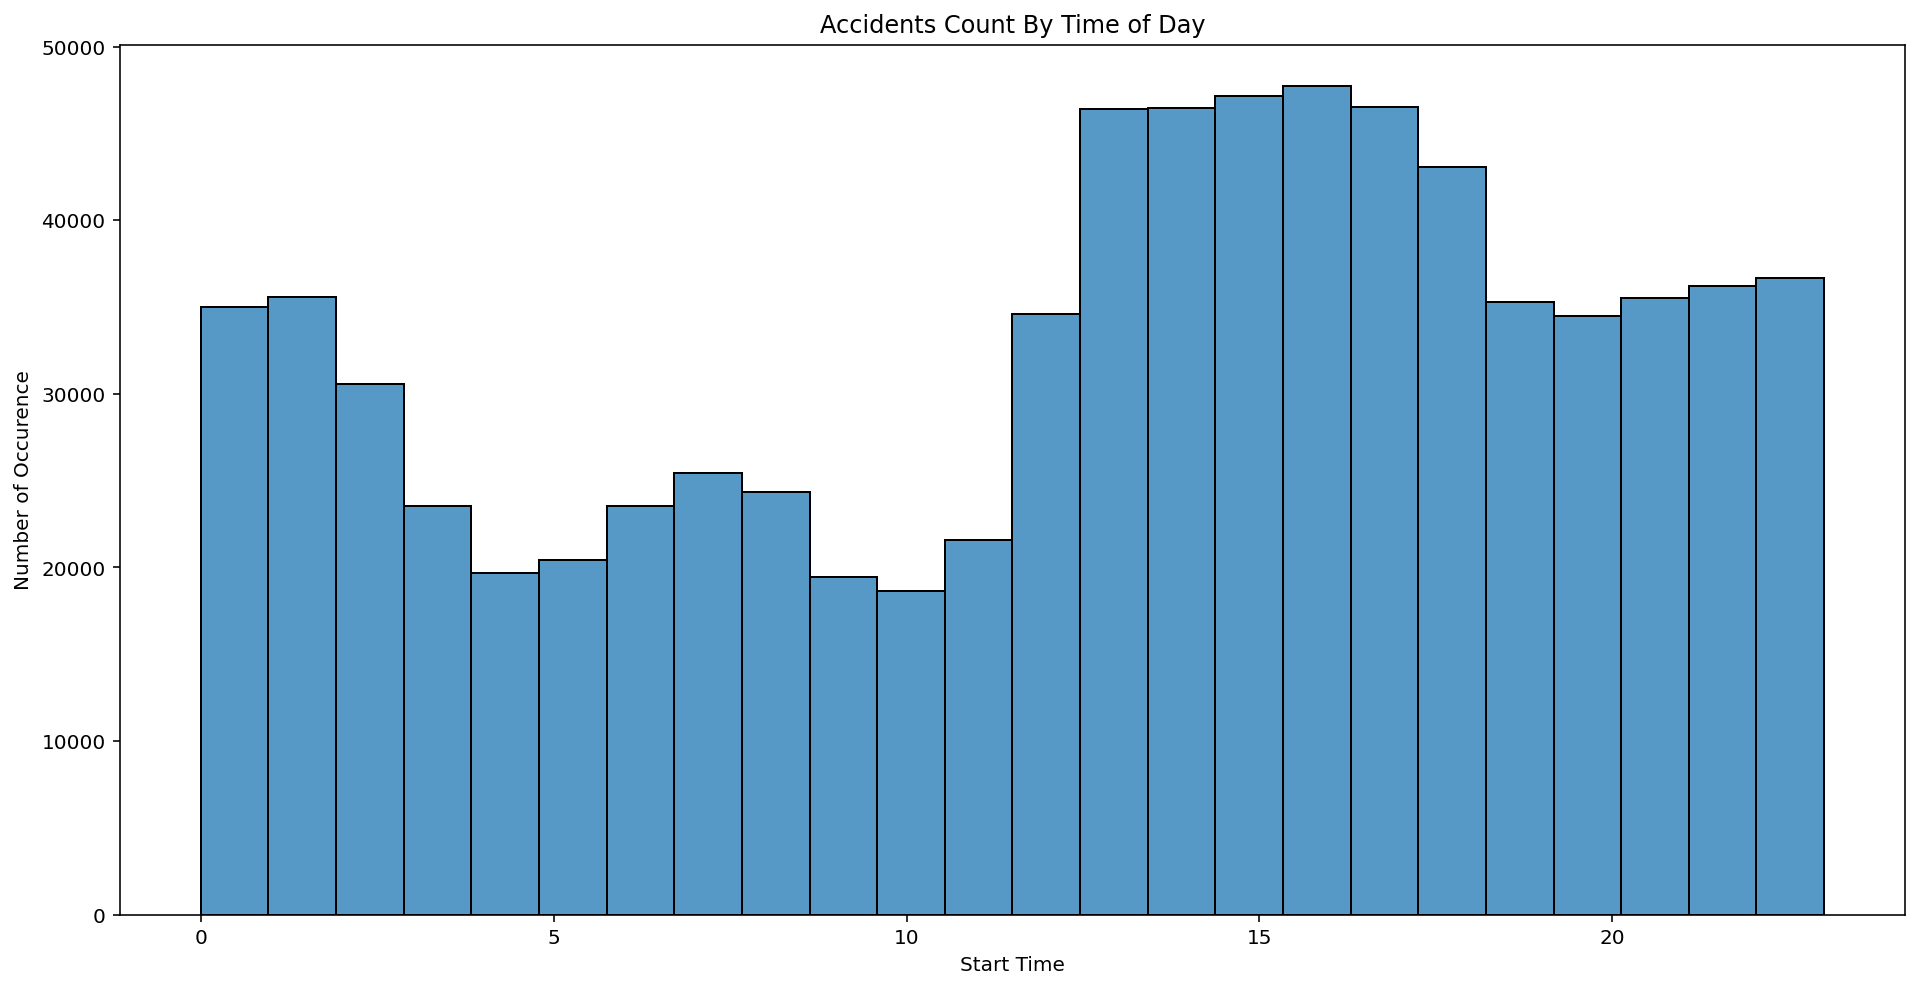

In [46]:
# Plot the distribution of occurence by time of the day.
# We can see the time of the day mof accidents happen, 4pm-6pm

fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(df_cp['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

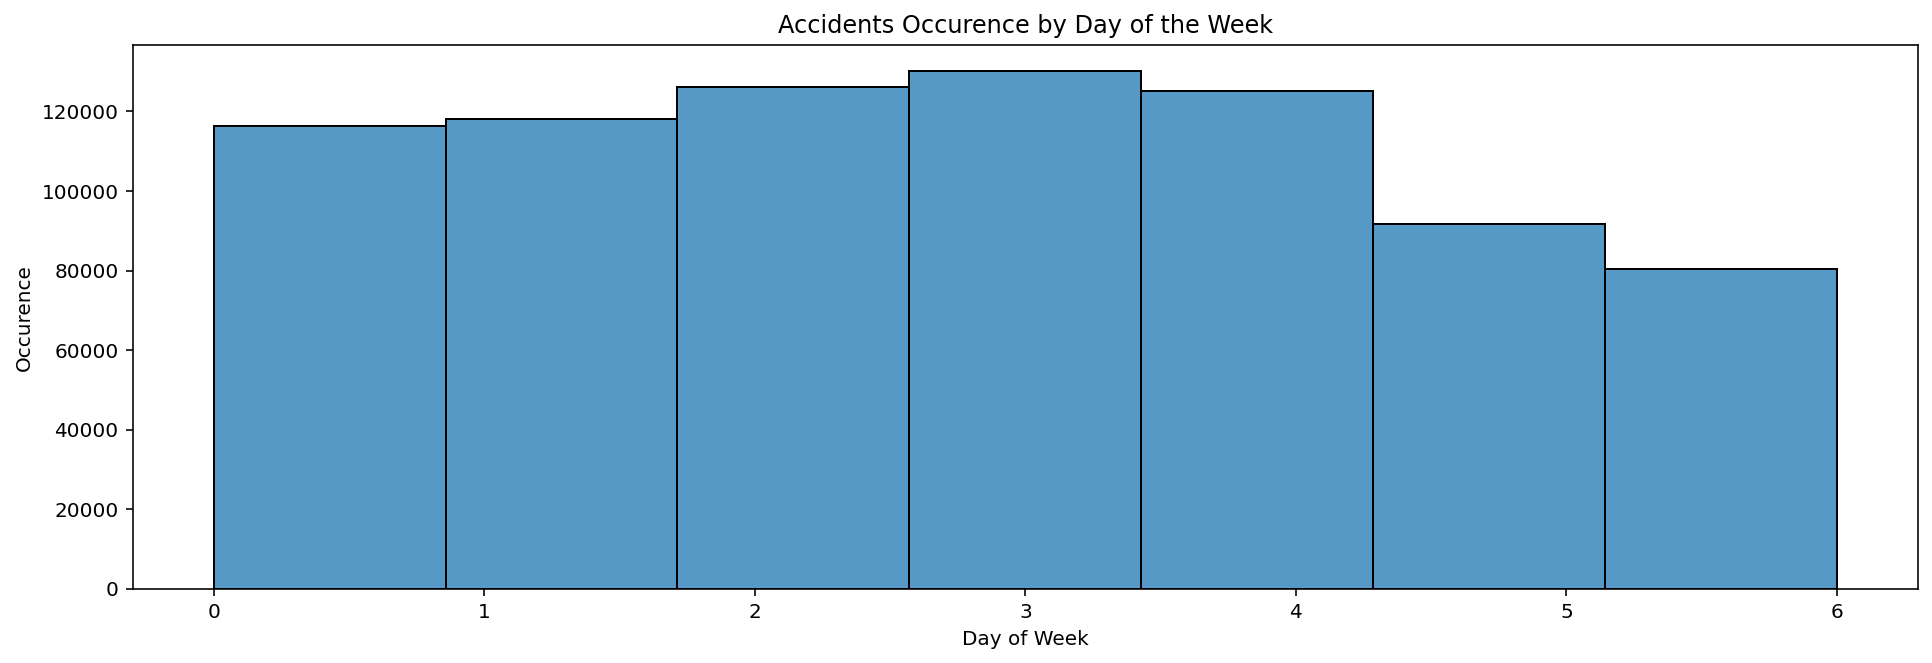

In [47]:
# Let's plot by day of the week 

fig, ax = plt.subplots(figsize=(16,5))
sns.histplot(df_cp['Start_Time'].dt.dayofweek, bins = 7)

plt.xlabel("Day of Week")
plt.ylabel("Occurence")
plt.title('Accidents Occurence by Day of the Week')

plt.show()

### Lets look at the weekends - Saturdays & Sundays

In [48]:
# Create a variable of the weekend days (Saturday & Sunday) for the next analysis

saturday = df_cp[df_cp['Start_Time'].dt.dayofweek == 5]
sunday = df_cp[df_cp['Start_Time'].dt.dayofweek == 6]

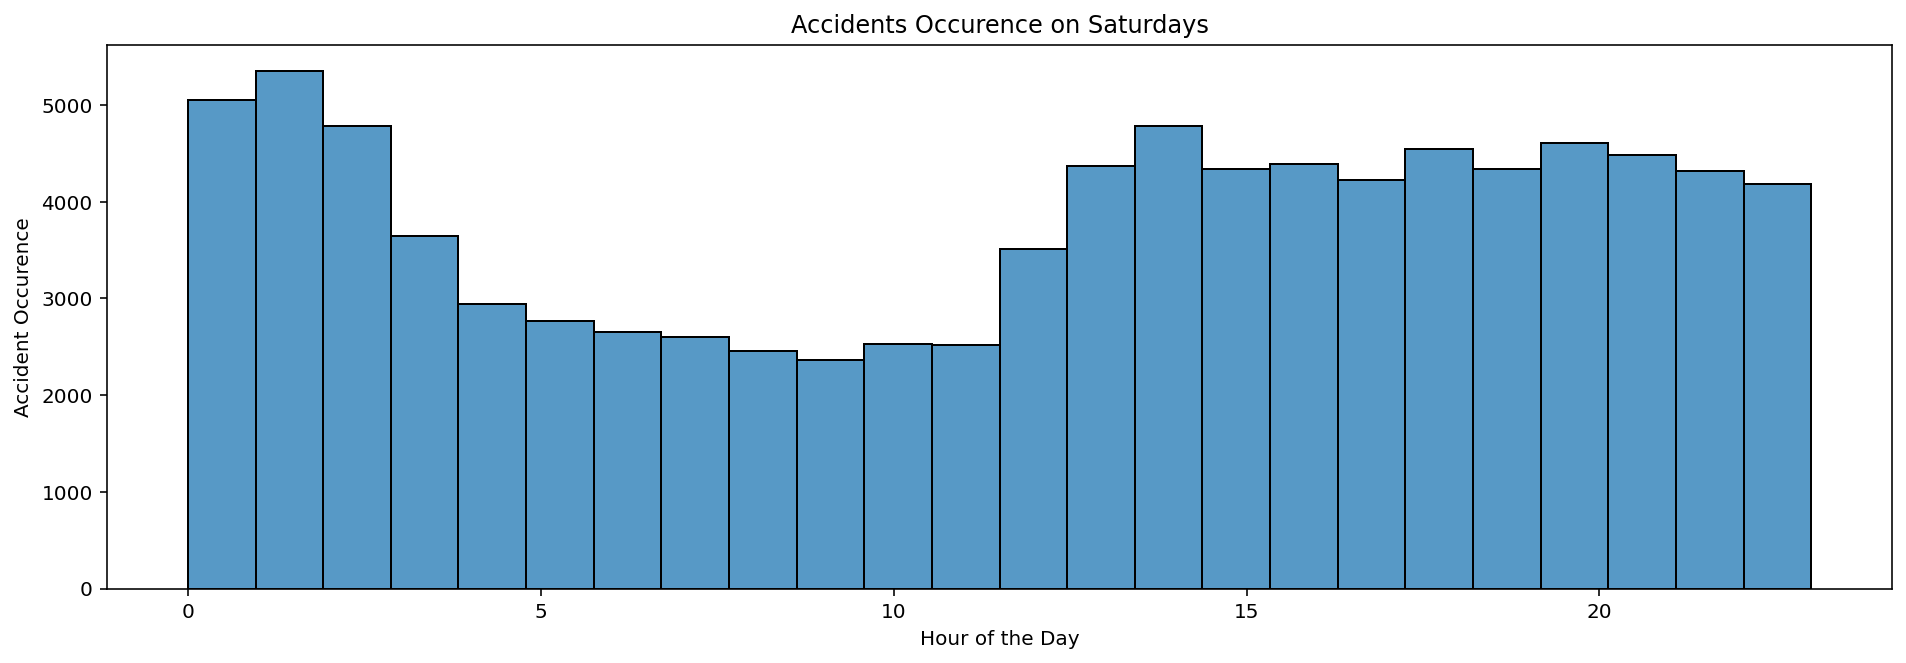

In [49]:
# The accident occurence pattern on Saturday is quite interesting. I have an idea why it is like this.

fig, ax = plt.subplots(figsize=(16,5))
sns.histplot(saturday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Saturdays')

plt.show()

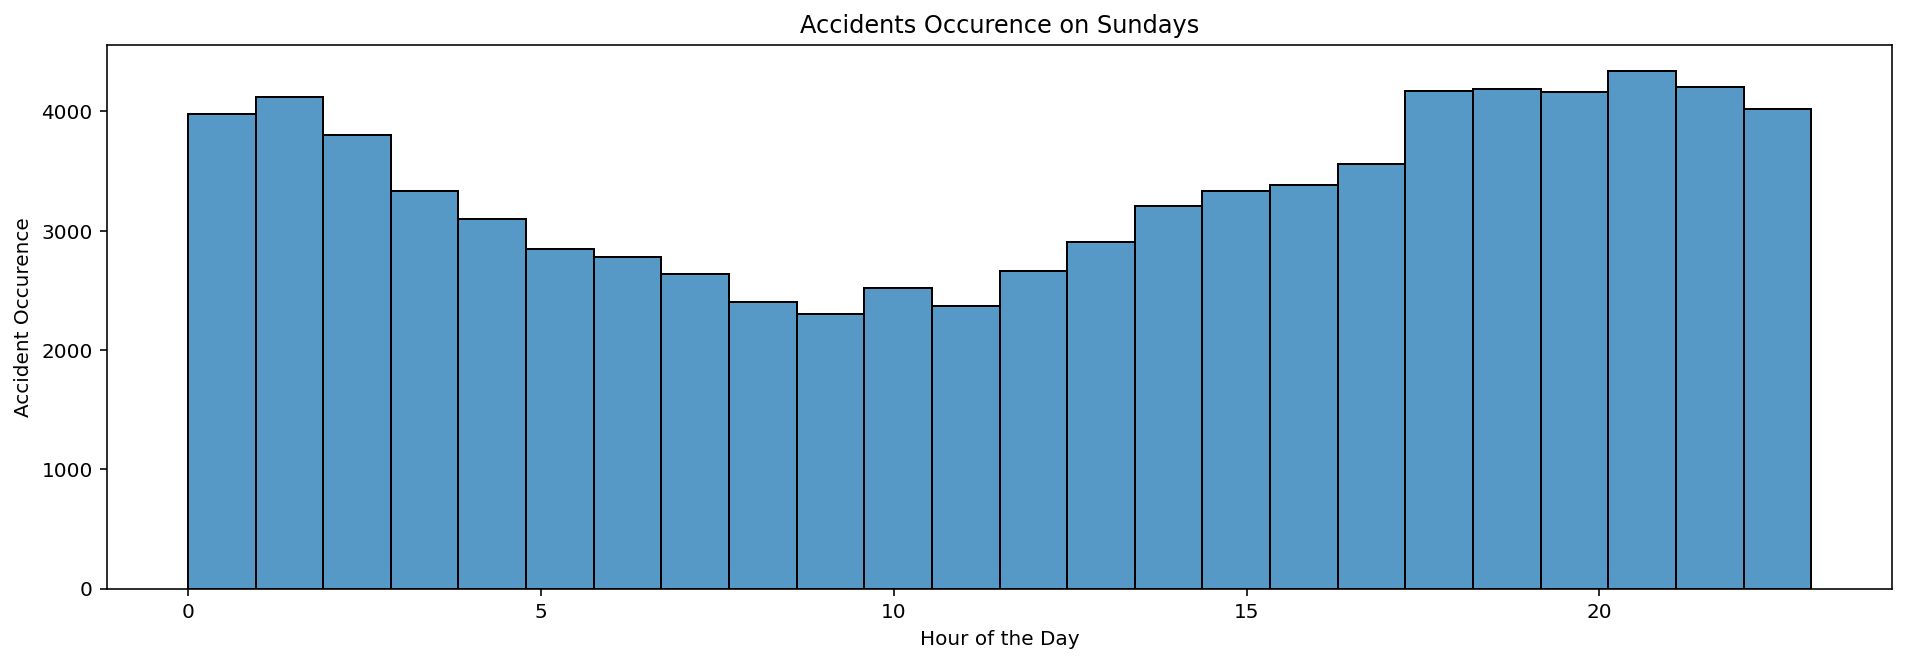

In [50]:
# this is even more interesting.

fig, ax = plt.subplots(figsize=(16,5))
sns.histplot(sunday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Sundays')

plt.show()

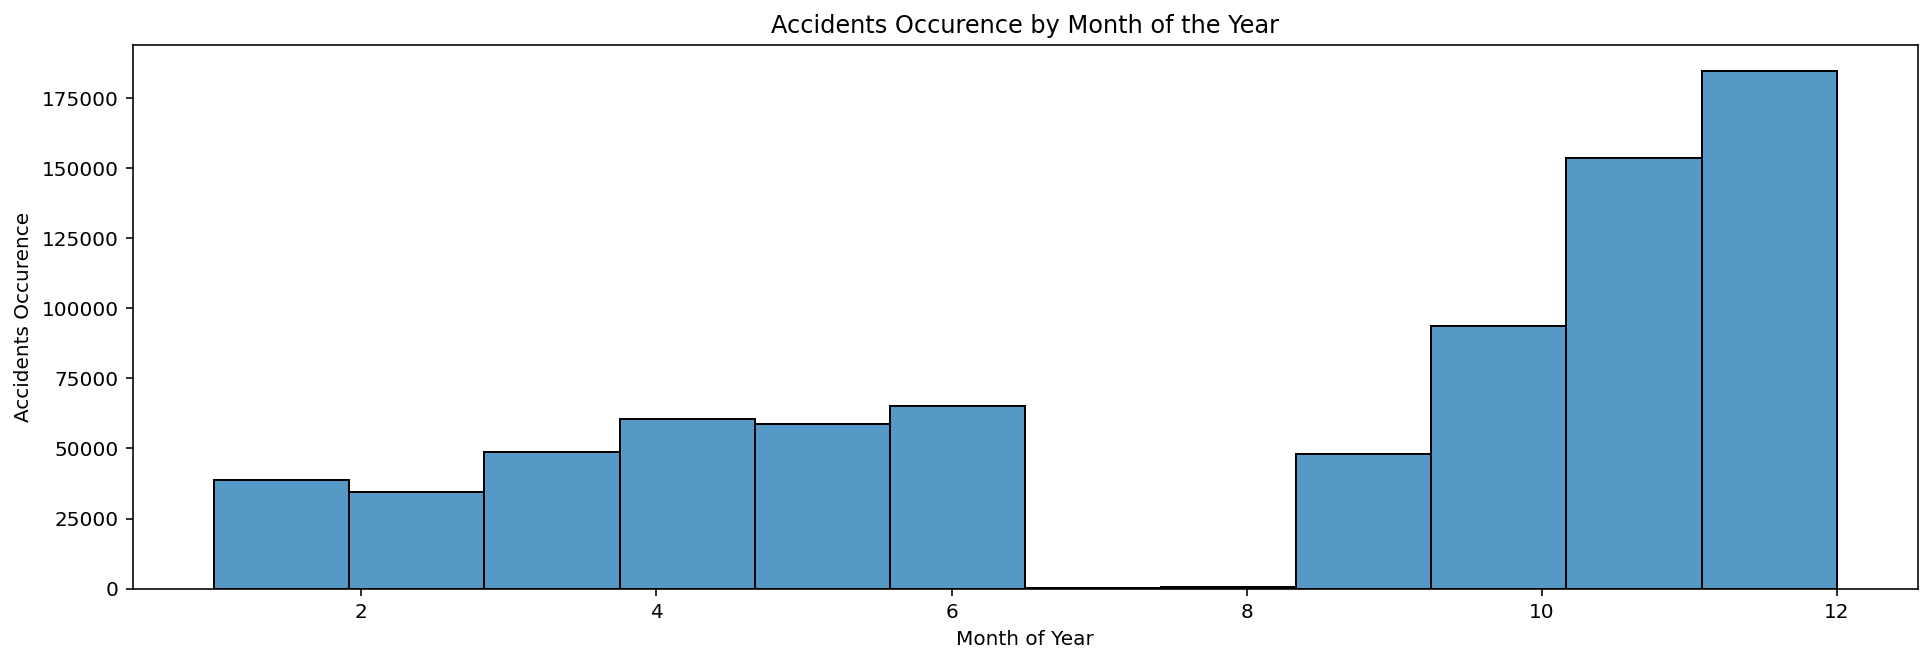

In [51]:
#Moving on, we can plot by month of the year

fig, ax = plt.subplots(figsize=(16,5))
sns.histplot(df_cp['Start_Time'].dt.month, bins = 12)

plt.xlabel("Month of Year")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month of the Year')

plt.show()

### Side of the road

In [52]:
# Moving on, what side of the road are accidents happening?

side_of_road =  df_cp.groupby(['Side']).count()['ID']
side_of_road

Side
L    135243
R    652689
Name: ID, dtype: int64

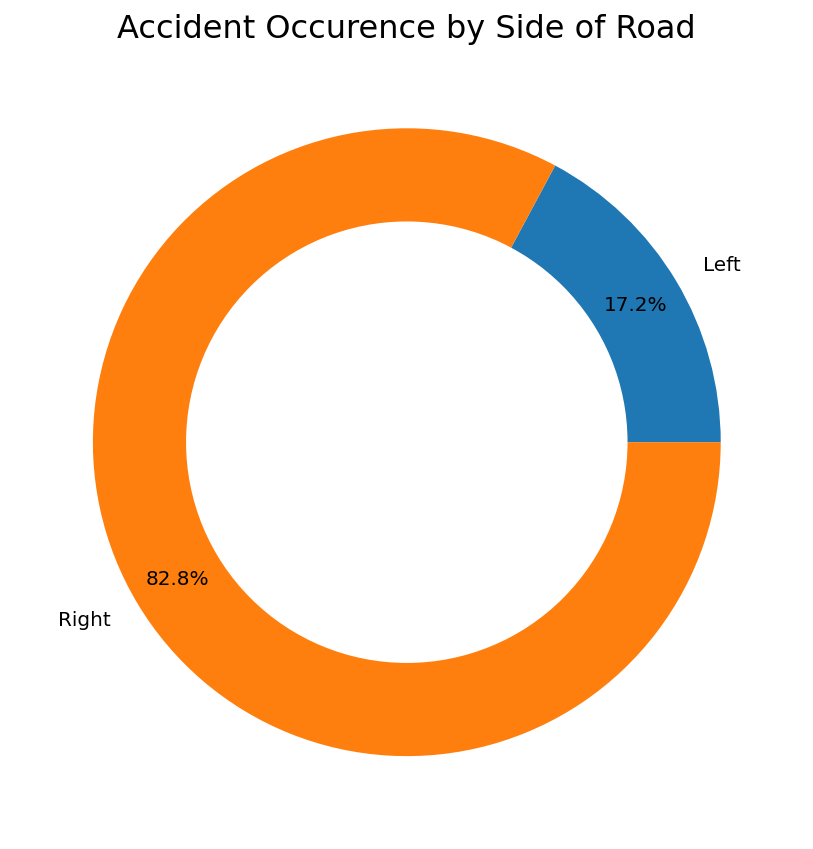

In [53]:
#Let's visualize that

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = ['Left', 'Right']
plt.pie(side_of_road, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident Occurence by Side of Road",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

## Weather Condition 

In [54]:
# What are the weather conditions at the time of accicent occurence

weather_conditions = df_cp.groupby(['Weather_Condition']).count()['ID']
weather_conditions

Weather_Condition
Blowing Dust                   45
Blowing Dust / Windy           58
Blowing Snow                   66
Blowing Snow / Windy           59
Cloudy                     128417
                            ...  
Thunder and Hail                1
Thunder in the Vicinity       892
Widespread Dust                12
Wintry Mix                    962
Wintry Mix / Windy             27
Name: ID, Length: 78, dtype: int64

In [55]:
# Weather conditions at time of occurence sorted

weather_conditions.sort_values(ascending=False)

Weather_Condition
Fair                         363633
Cloudy                       128417
Mostly Cloudy                 97096
Partly Cloudy                 61068
Light Rain                    38226
                              ...  
Sleet / Windy                     1
Thunder and Hail                  1
Sand / Dust Whirls Nearby         1
Drifting Snow                     1
Mist / Windy                      1
Name: ID, Length: 78, dtype: int64

In [56]:
# Time of accident occurence sorted and filtered to top 20

weather_conditions.sort_values(ascending=False)[:20]

Weather_Condition
Fair                     363633
Cloudy                   128417
Mostly Cloudy             97096
Partly Cloudy             61068
Light Rain                38226
Fog                       14459
Rain                       9312
Light Snow                 9265
Haze                       8716
Fair / Windy               5272
Heavy Rain                 3272
Mostly Cloudy / Windy      3128
Cloudy / Windy             2683
Smoke                      2366
Light Drizzle              2272
Partly Cloudy / Windy      1702
Light Rain / Windy         1535
T-Storm                    1152
Snow                        980
Wintry Mix                  962
Name: ID, dtype: int64

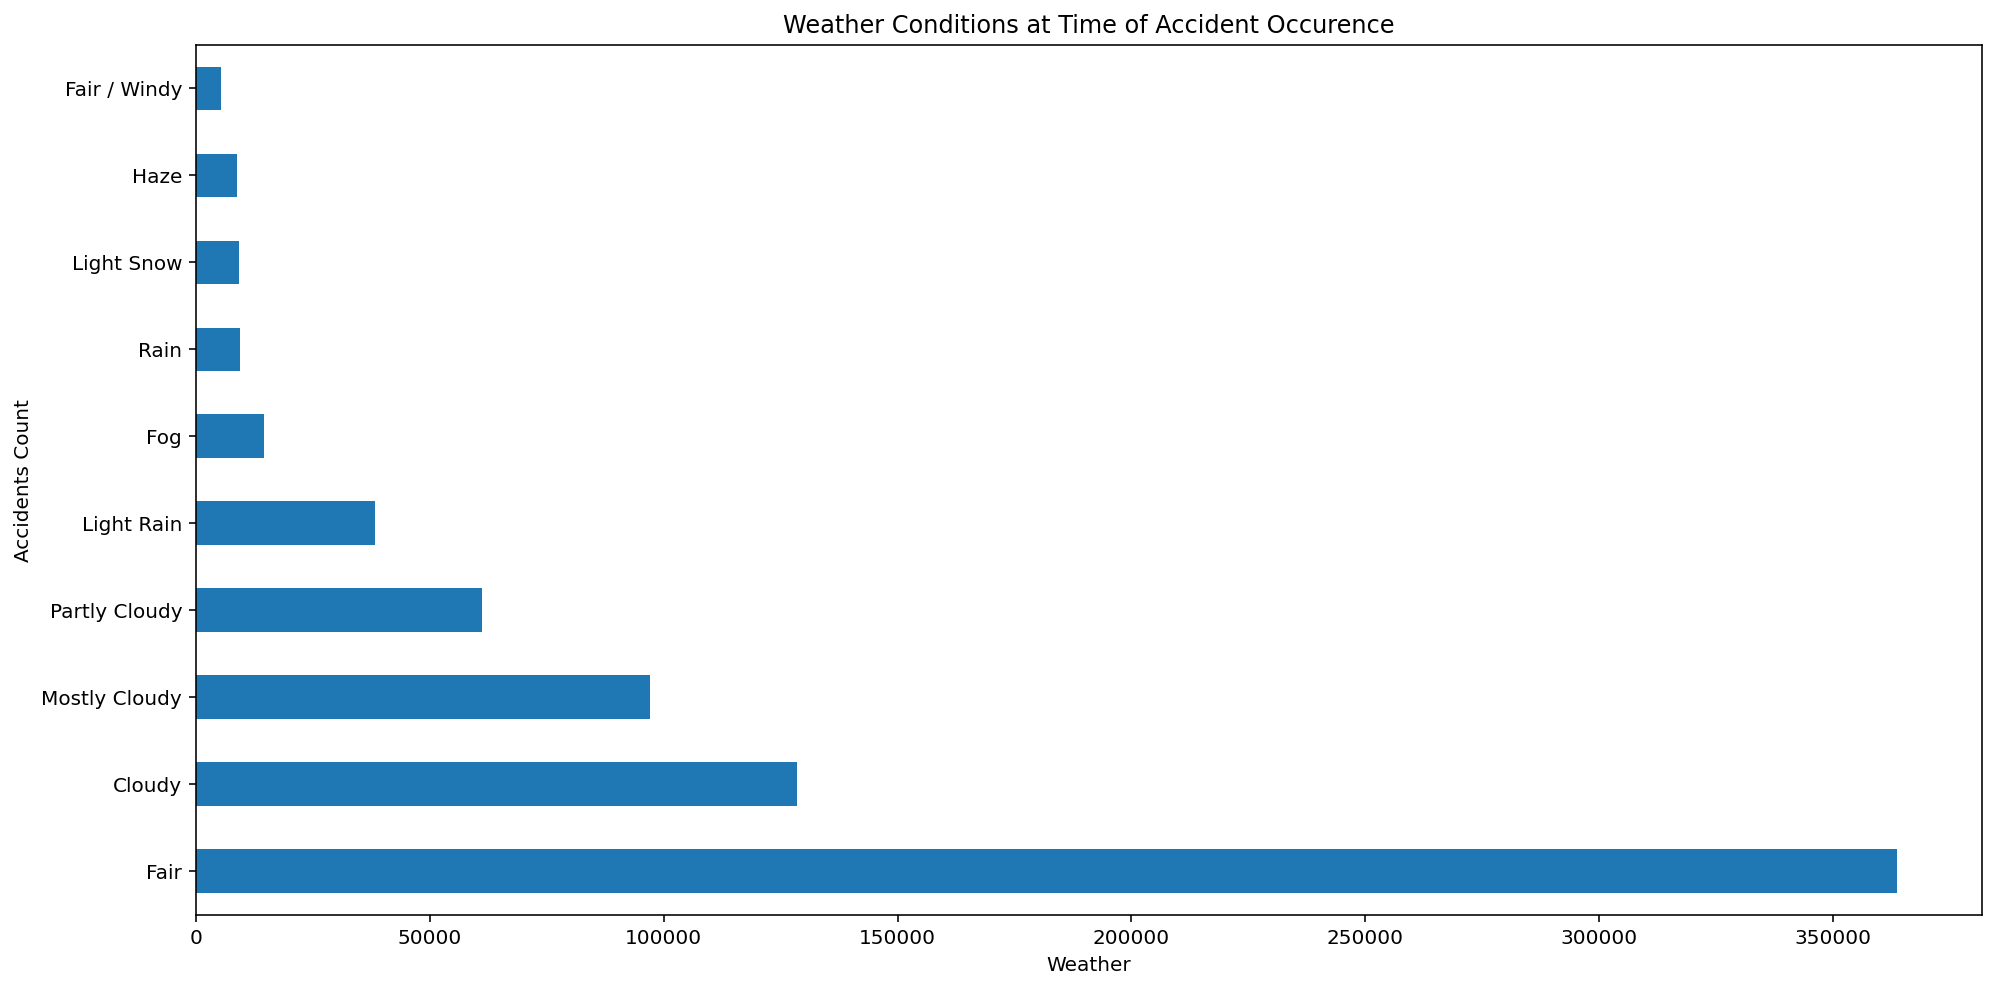

In [57]:
# Let's visualize top 20 weather conditions at the time of accident occurence

fig, ax = plt.subplots(figsize=(16,8))
weather_conditions.sort_values(ascending=False)[:10].plot(kind='barh')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()

## Lookin at longitude & lattitude

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

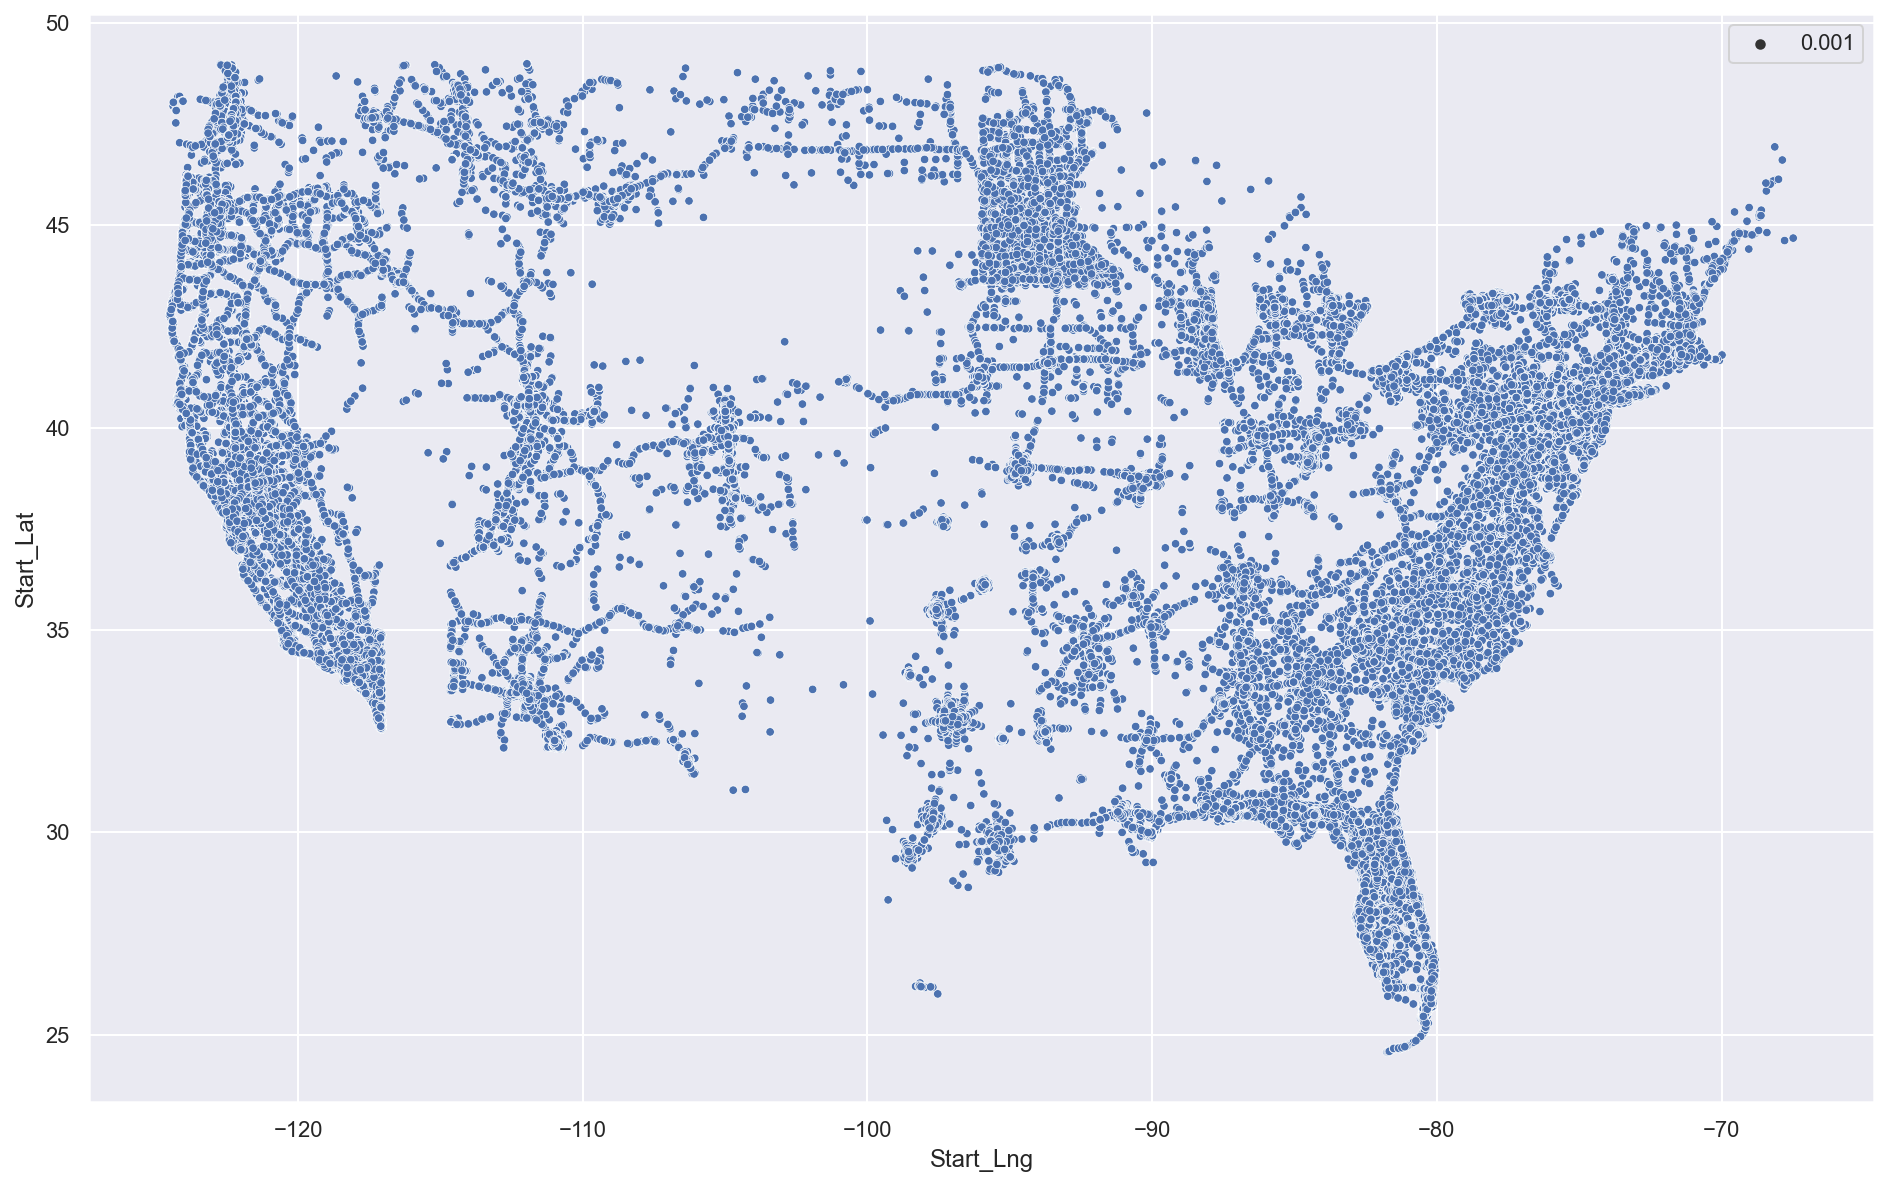

In [58]:
sns.set(rc={'figure.figsize':(16,10)})
sns.scatterplot(x=df_cp.Start_Lng, y=df_cp.Start_Lat, size=0.001)

In [59]:
import folium
lat, lon = df_cp.Start_Lat[0], df_cp.Start_Lng[0]
lat, lon

(39.594265, -76.671599)

In [60]:
for x in df_cp[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

539108    28.451500
59090     44.952009
508228    38.636300
434596    38.847731
277022    34.062386
            ...    
188372    29.984916
776540    34.156661
512370    33.850981
16702     28.414372
334283    31.789707
Name: Start_Lat, Length: 100, dtype: float64
539108    -81.196890
59090     -93.049660
508228   -121.291800
434596    -77.220228
277022   -118.000549
             ...    
188372    -90.070212
776540   -118.413771
512370   -117.814500
16702     -81.422984
334283   -106.395494
Name: Start_Lng, Length: 100, dtype: float64


In [61]:
zip(list(df_cp.Start_Lat), list(df_cp.Start_Lng))

In [62]:
from folium.plugins import HeatMap

In [63]:
sample_df = df_cp.sample(int(0.001 * len(df_cp)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [64]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [65]:
#plotting the marker points on US map with sample size of 0.1% of wholw dataset
sample_df_2 =df_cp.sample(int(0.001 * len(df_cp))) #creating a sample of 0.01%

#creating a variable containing the list of latitudes and longitudes
locations = sample_df_2[['Start_Lat', 'Start_Lng']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[0]

#plotting the markers on the US map using folium library
map = folium.Map(zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map

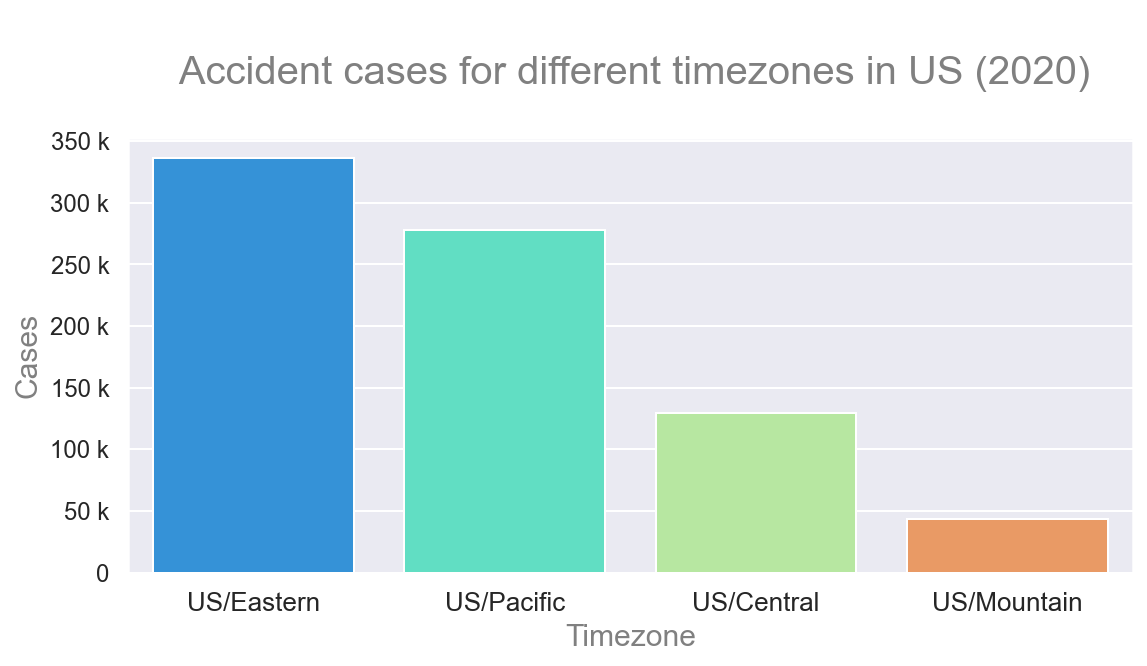

In [67]:
timezone = pd.DataFrame(df_cp.Timezone.value_counts()).reset_index().rename(columns={"index":"Timezone","Timezone":"Cases"})
plt.figure(figsize=(9,4))
plt.title('\n Accident cases for different timezones in US (2020)\n', size=20, color='grey')
plt.xlabel('\n Timezone \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=timezone.Timezone , y=timezone.Cases,palette="rainbow")
import matplotlib.ticker as ticker
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()